<a href="https://colab.research.google.com/github/zfukuoka/Copying_a_sutra/blob/master/ISBN978-4-7981-6720-6/list9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 9 変分オートエンコーダ（VAE）

* 9.1 VAEの概要
* 9.2 VAEの仕組み
* 9.3 オートエンコーダの実装

### リスト 9.1 訓練用データを用意する

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


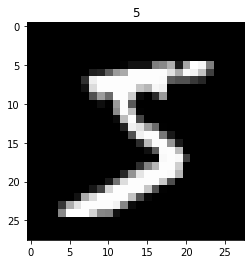

訓練用データの形状: (60000, 784) テスト用データの形状: (10000, 784)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()
print(x_train.shape, x_test.shape)

# 各ピクセルの値を0-1の範囲に収める
x_train = x_train / 255
x_test = x_test / 255

# 手書き文字画像を1つ表示
plt.imshow(x_train[0].reshape(28, 28), cmap="gray")
plt.title(t_train[0])
plt.show()

# 1次元に変換する
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print("訓練用データの形状:", x_train.shape, "テスト用データの形状:", x_test.shape)

### リスト 9.2 オートエンコーダの各設定

In [2]:
epochs = 20
batch_size = 128
n_in_out = 784
n_mid = 64

### リスト 9.3 オートエンコーダのモデルの構築

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# 各層
x = Input(shape=(n_in_out,))
encoder = Dense(n_mid, activation="relu")
decoder = Dense(n_in_out, activation="sigmoid")

# ネットワーク
h = encoder(x)
y = decoder(h)

# オートエンコーダのモデル
model_autoencoder = Model(x, y)
model_autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
model_autoencoder.summary()
print()

# Decoderのみのモデル
input_decoder = Input(shape=(n_mid,))
model_decoder = Model(input_decoder, decoder(input_decoder))
model_decoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_1 (Dense)             (None, 7